In [1]:
import os
import warnings
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
sns.set_style(style='white')
%matplotlib inline

In [2]:
pwd

'/Users/evol-lab/Documents/Projects/roles-smells-metrics-package'

In [3]:
# create the list of selected projects 

path  = 'data/Smells/designite/Desktop/'
projects = [projects for projects in os.listdir(path) if not projects.startswith('.')]
projects

['ipscan-3.7.3',
 'LiveChatServer-4.1',
 'JetUML-3.1',
 'ganttproject-2.8.11',
 'GoGreen-0.1.3',
 'LogFX-0.9.1',
 'pgptool-0.5.9.2',
 'argouml-0.35.1',
 'keystore-explorer-5.4.4',
 'SweetHome3D-5.6',
 'jEdit-5.5.0',
 'mars-sim-3.1.0',
 'checkstyle-8.39',
 'freemind-1.0.0',
 'jpass-0.1.20']

In [4]:
all_designite_metrics_desktop = []
for prj in projects:
    try:
        file = f'data/Smells/designite/Desktop/{prj}/TypeMetrics.csv'
        # Read each TypeMetrics.csv
        df = pd.read_csv(file)
    
        # Add required columns
        # df["Project_name"] = prj
        df["Project_type"] = "Desktop"
        
        all_designite_metrics_desktop.append(df)
    except Exception as e:
        print(f"❌ Failed to process {file}: {e}")

In [5]:
# Combine all DataFrames into one
merged_df = pd.concat(all_designite_metrics_desktop, ignore_index=True)

# Save the result
# output_path = os.path.join(base_dir, "merged_mobile_typemetrics_all_projects.csv")
# merged_df.to_csv('results/csv/all_designite_metrics_desktop.csv', index=False)

print(f"✅ Merged file saved to: result/csv/")

✅ Merged file saved to: result/csv/


In [6]:
metric_mobile = 'results/csv/all_designite_metrics_mobile.csv'
metric_desktop = 'results/csv/all_designite_metrics_desktop.csv'
metric_m = pd.read_csv(metric_mobile)
metric_d = pd.read_csv(metric_desktop)

In [7]:
all_metrics_designite =pd.concat([metric_m, metric_d], ignore_index=True)

In [ ]:
# all_metrics_designite.to_csv('results/csv/all_designite_metrics.csv', index=False)

Combined RS data

In [8]:
rs_mobile = pd.read_csv('results/csv/mobile_rs.csv')
# rs_mobile.head()

In [9]:
rs_desktop = pd.read_csv('results/csv/desktop_rs.csv')
# rs_desktop.head()

In [10]:
all_rs = pd.concat([rs_mobile, rs_desktop], ignore_index=True)

In [11]:
all_rs.drop(columns=['Unnamed: 0'], inplace=True)
all_rs.to_csv('results/csv/all_rs.csv', index=False)

In [12]:
all_rs.shape

(11386, 29)

In [13]:
# combine all_rs with all_metrics_designite on fullpathname and file path columns   
# First, strip "/Users/evol-lab/Documents/Projects/roles-smells-metrics-package/data/SourceProjects/Desktop/" from all_metrics_designite['File Path']
all_metrics_designite = pd.read_csv('results/csv/all_designite_metrics.csv')
all_metrics_designite['File path'] = all_metrics_designite['File path'].str.replace('/Users/evol-lab/Documents/Projects/roles-smells-metrics-package/data/SourceProjects/Desktop/', '')
all_metrics_designite['File path'] = all_metrics_designite['File path'].str.replace('/Users/evol-lab/Documents/Projects/roles-smells-metrics-package/data/SourceProjects/Mobile/', '')
# The merge with inner join to keep only matching rows
combined_df = pd.merge(all_rs, all_metrics_designite, left_on='Fullpathname', right_on='File path', how='inner')

# combined_df = pd.merge(all_rs, all_metrics_designite, left_on='Fullpathname', right_on='File path', how='left') 
combined_df.head()

Fullpathname           Project  \
0  TweetLanes-1.4.1/android/libraries/SocialNetLi...  TweetLanes-1.4.1   
1  TweetLanes-1.4.1/android/libraries/SocialNetLi...  TweetLanes-1.4.1   
2  TweetLanes-1.4.1/android/libraries/SocialNetLi...  TweetLanes-1.4.1   
3  TweetLanes-1.4.1/android/libraries/SocialNetLi...  TweetLanes-1.4.1   
4  TweetLanes-1.4.1/android/libraries/SocialNetLi...  TweetLanes-1.4.1   

   Classname  loc  numAttr  numMethod  setters  getters  isPersist  \
0   Autolink  256        9         11        1        0      False   
1   Autolink  256        9         11        1        0      False   
2   Autolink  256        9         11        1        0      False   
3  Extractor  592        1         17        1        0      False   
4  Extractor  592        1         17        1        0      False   

   isCollection  ...  LOC  WMC  NC  DIT      LCOM  FANIN  FANOUT  \
0         False  ...    0   39   0    0  0.000000      1       1   
1         False  ...    3    0   0    0 -1.000000      0       0   
2         False  ...    3    0   0    0 -1.000000      0       0   
3         False  ...  398   62   0    0  0.105263      2       1   
4         False  ...   69    0   0    0 -1.000000      0       0   

                                           File path  Line no  Project_type  
0  TweetLanes-1.4.1/android/libraries/SocialNetLi...       12        Mobile  
1  TweetLanes-1.4.1/android/libraries/SocialNetLi...       18        Mobile  
2  TweetLanes-1.4.1/android/libraries/SocialNetLi...       22        Mobile  
3  TweetLanes-1.4.1/android/libraries/SocialNetLi...       10        Mobile  
4  TweetLanes-1.4.1/android/libraries/SocialNetLi...       14        Mobile  

[5 rows x 46 columns]

In [14]:
combined_df.shape

(3141, 46)

In [22]:
# lable == controller and project_type == Mobile
combined_df_mobile_controller = combined_df[(combined_df['Project_type'] == 'Desktop')]
combined_df_mobile_controller.shape

(0, 46)

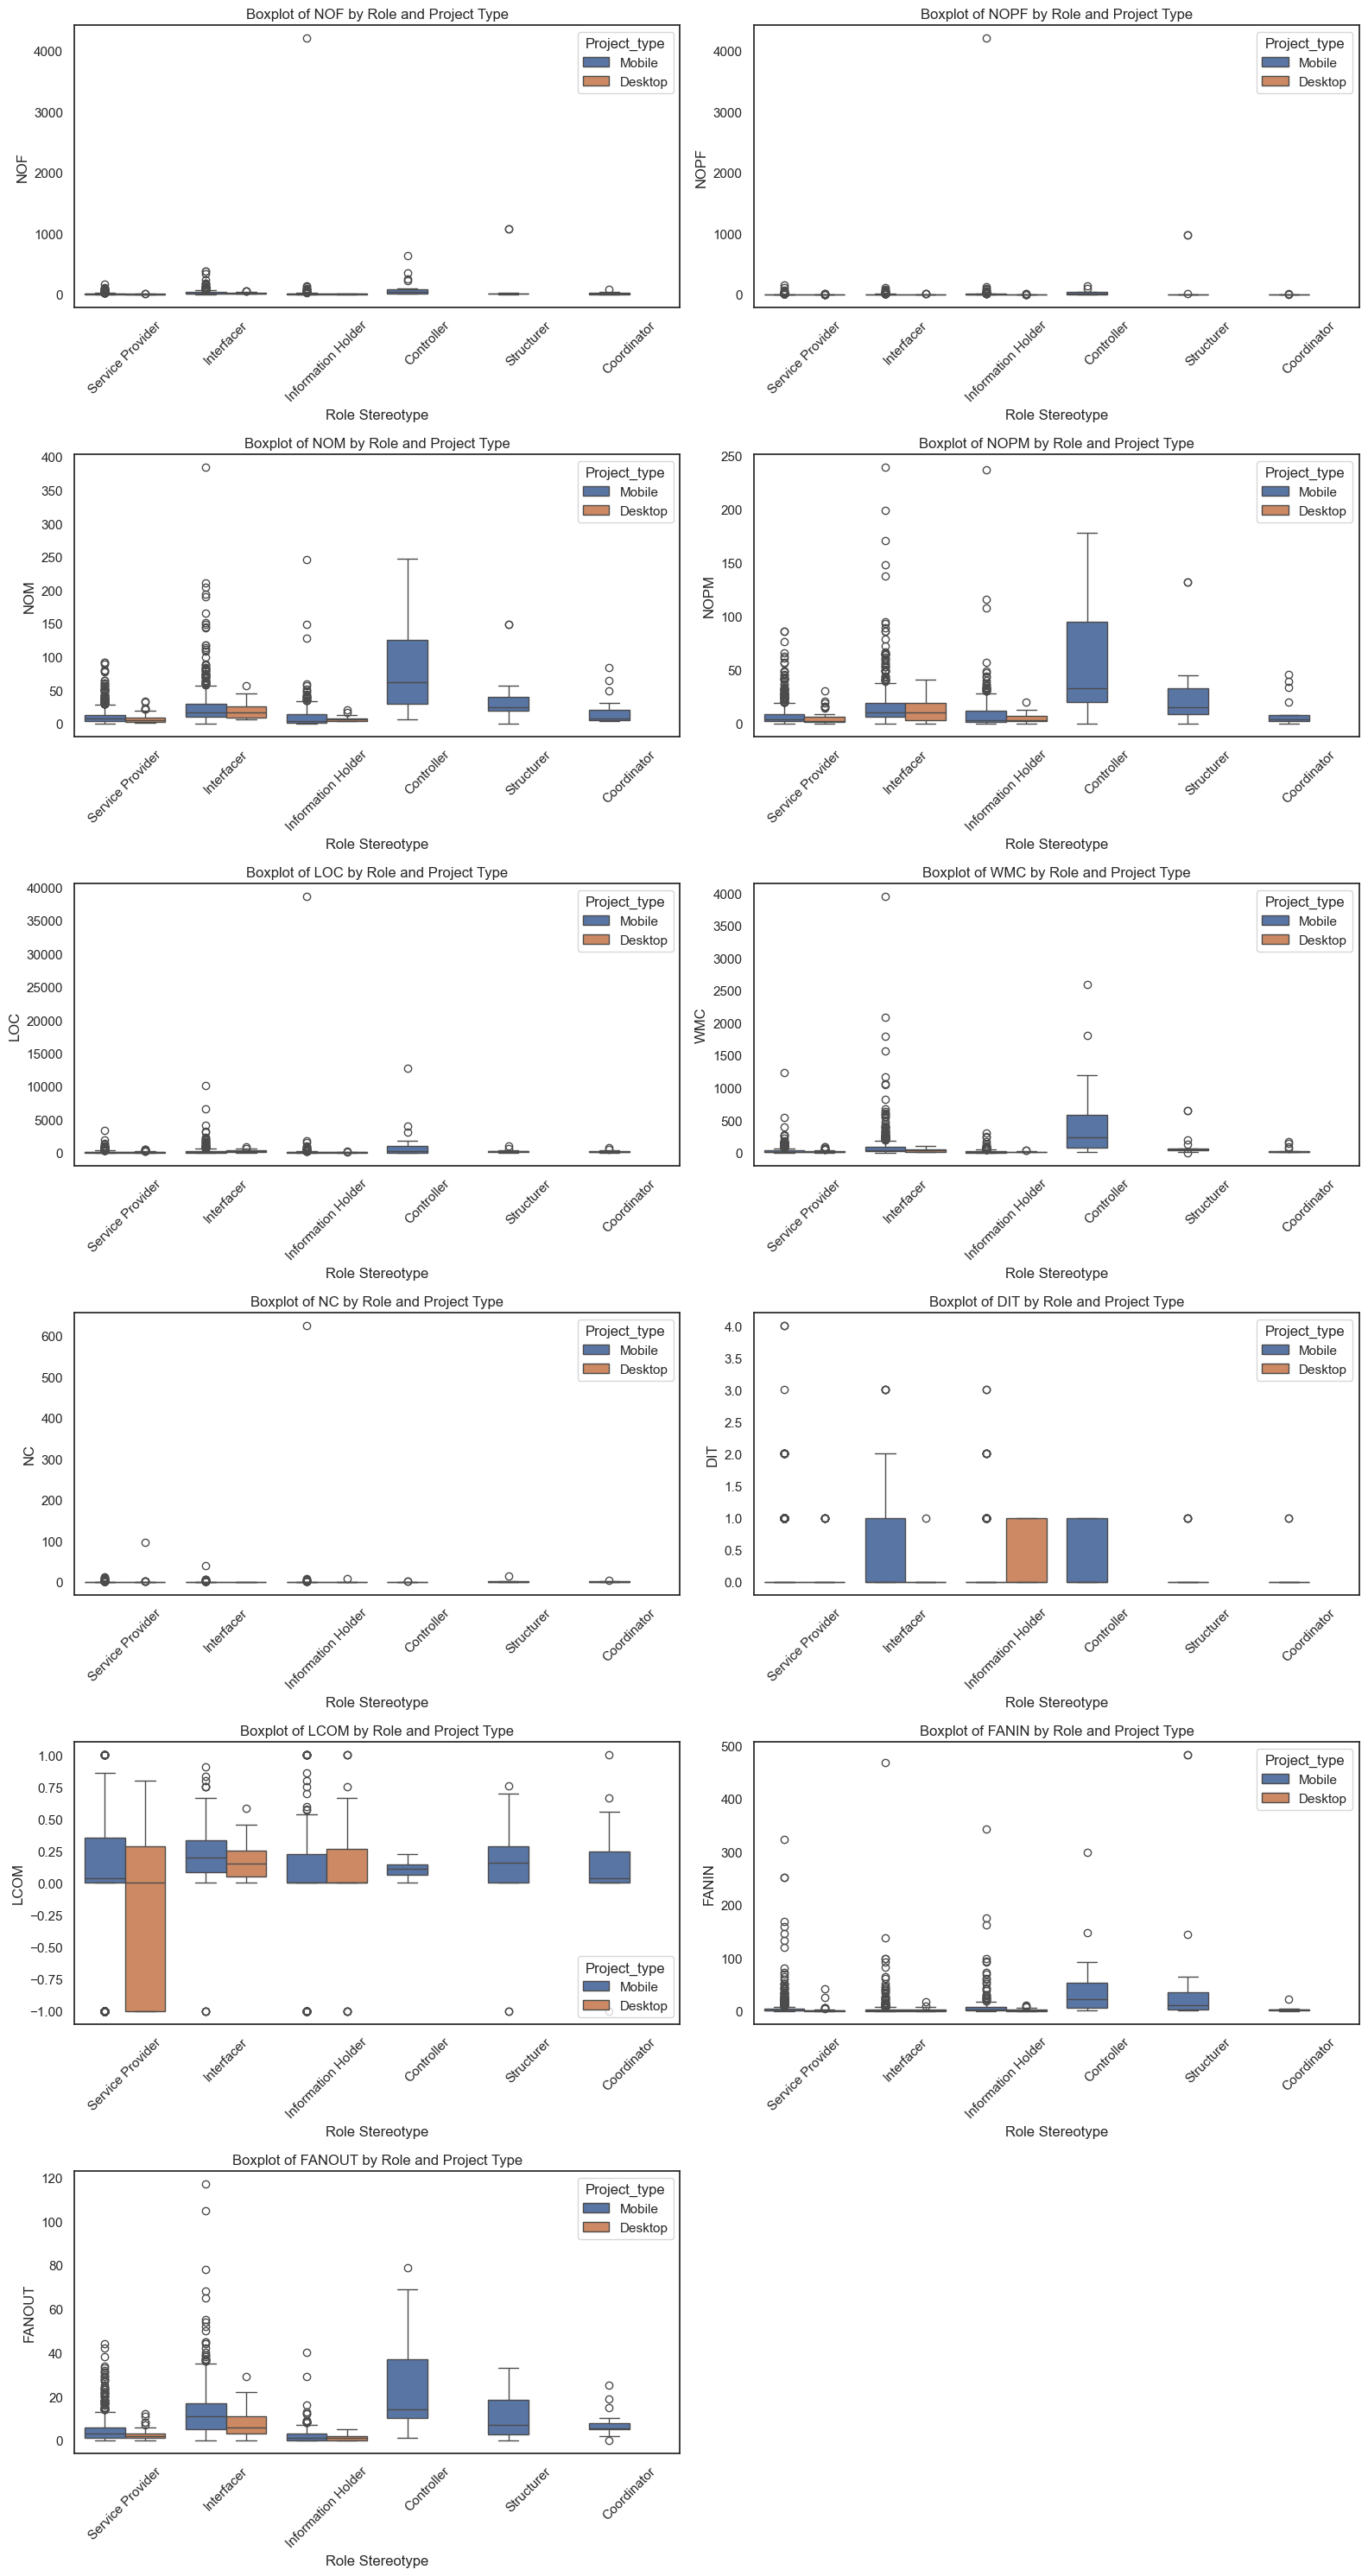

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the relevant columns are present
metrics = ["NOF", "NOPF", "NOM", "NOPM", "LOC", "WMC", "NC", "DIT", "LCOM", "FANIN", "FANOUT"]
roles = ["Service Provider", "Controller", "Information Holder", "Coordinator", "Structurer", "Interfacer"]

merged_df = pd.read_csv('results/csv/merged_designite_metrics_rs_ds.csv')

# Filter data to only include relevant roles and drop missing values
filtered_df = merged_df[merged_df["label"].isin(roles)].dropna(subset=metrics + ["label", "Project_type"])

# Create boxplots for each metric, grouped by Project_type
import math
num_metrics = len(metrics)
cols = 2
rows = math.ceil(num_metrics / cols)

plt.figure(figsize=(16, rows * 5))
for i, metric in enumerate(metrics):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=filtered_df, x="label", y=metric, hue="Project_type")
    plt.title(f"Boxplot of {metric} by Role and Project Type")
    plt.xlabel("Role Stereotype")
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# Compute statistical summaries (mean and median) by Role and Project Type
mean_summary = filtered_df.groupby(["label", "Project_type"])[metrics].mean().reset_index()
median_summary = filtered_df.groupby(["label", "Project_type"])[metrics].median().reset_index()

# # Display the summaries
# import ace_tools as tools; tools.display_dataframe_to_user(name="Mean Summary by Role and Project Type", dataframe=mean_summary)
# tools.display_dataframe_to_user(name="Median Summary by Role and Project Type", dataframe=median_summary)


In [8]:
mean_summary

label Project_type         NOF        NOPF        NOM  \
0          Controller       Mobile   93.400000   21.000000  84.840000   
1         Coordinator       Mobile   14.222222    0.888889  18.555556   
2  Information Holder      Desktop    4.371429    0.428571   6.600000   
3  Information Holder       Mobile   30.030435   23.778261  11.943478   
4          Interfacer      Desktop   18.655172    0.793103  21.172414   
5          Interfacer       Mobile   27.102564    2.650888  26.483235   
6    Service Provider      Desktop    3.144737    0.328947   7.486842   
7    Service Provider       Mobile    7.701691    1.537440  10.658213   
8          Structurer       Mobile  122.631579  103.157895  37.947368   

        NOPM          LOC         WMC        NC       DIT      LCOM  \
0  57.960000  1128.040000  473.160000  0.080000  0.480000  0.104790   
1  10.166667   146.333333   35.166667  0.444444  0.111111  0.123648   
2   4.942857    58.542857    9.542857  0.228571  0.285714  0.069202   
3  10.200000   264.386957   18.830435  2.904348  0.239130 -0.061511   
4  12.620690   239.724138   37.034483  0.000000  0.034483  0.168987   
5  17.061144   256.696252  100.327416  0.240631  0.313609  0.219877   
6   4.671053    95.131579   16.565789  1.342105  0.105263 -0.204577   
7   7.362319   113.107488   29.113527  0.167874  0.224638 -0.003327   
8  29.368421   225.000000  115.631579  1.052632  0.210526  0.097998   

       FANIN     FANOUT  
0  41.440000  21.880000  
1   3.277778   7.666667  
2   1.942857   1.371429  
3  11.056522   2.230435  
4   2.413793   7.965517  
5   5.376726  13.147929  
6   1.815789   2.394737  
7   6.206522   4.835749  
8  69.631579  10.421053

In [9]:
median_summary 

label Project_type   NOF  NOPF   NOM  NOPM    LOC    WMC   NC  \
0          Controller       Mobile  44.0  11.0  62.0  33.0  206.0  236.0  0.0   
1         Coordinator       Mobile   4.0   0.0   7.0   3.5   68.5   11.5  0.0   
2  Information Holder      Desktop   4.0   0.0   6.0   3.0   54.0    8.0  0.0   
3  Information Holder       Mobile   6.0   1.0   4.0   3.0   33.0    6.0  0.0   
4          Interfacer      Desktop  16.0   0.0  17.0  10.0  214.0   32.0  0.0   
5          Interfacer       Mobile  16.0   0.0  16.0  10.0  114.0   41.0  0.0   
6    Service Provider      Desktop   2.0   0.0   5.0   2.5   52.5    9.0  0.0   
7    Service Provider       Mobile   4.0   0.0   7.0   4.0   61.0   15.0  0.0   
8          Structurer       Mobile  13.0   0.0  24.0  15.0  170.0   43.0  0.0   

   DIT      LCOM  FANIN  FANOUT  
0  0.0  0.111111   22.0    14.0  
1  0.0  0.035714    2.0     5.5  
2  0.0  0.000000    1.0     1.0  
3  0.0  0.000000    3.0     1.0  
4  0.0  0.153846    1.0     6.0  
5  0.0  0.200000    1.0    11.0  
6  0.0  0.000000    1.0     2.0  
7  0.0  0.035714    1.0     3.0  
8  0.0  0.157895   11.0     7.0

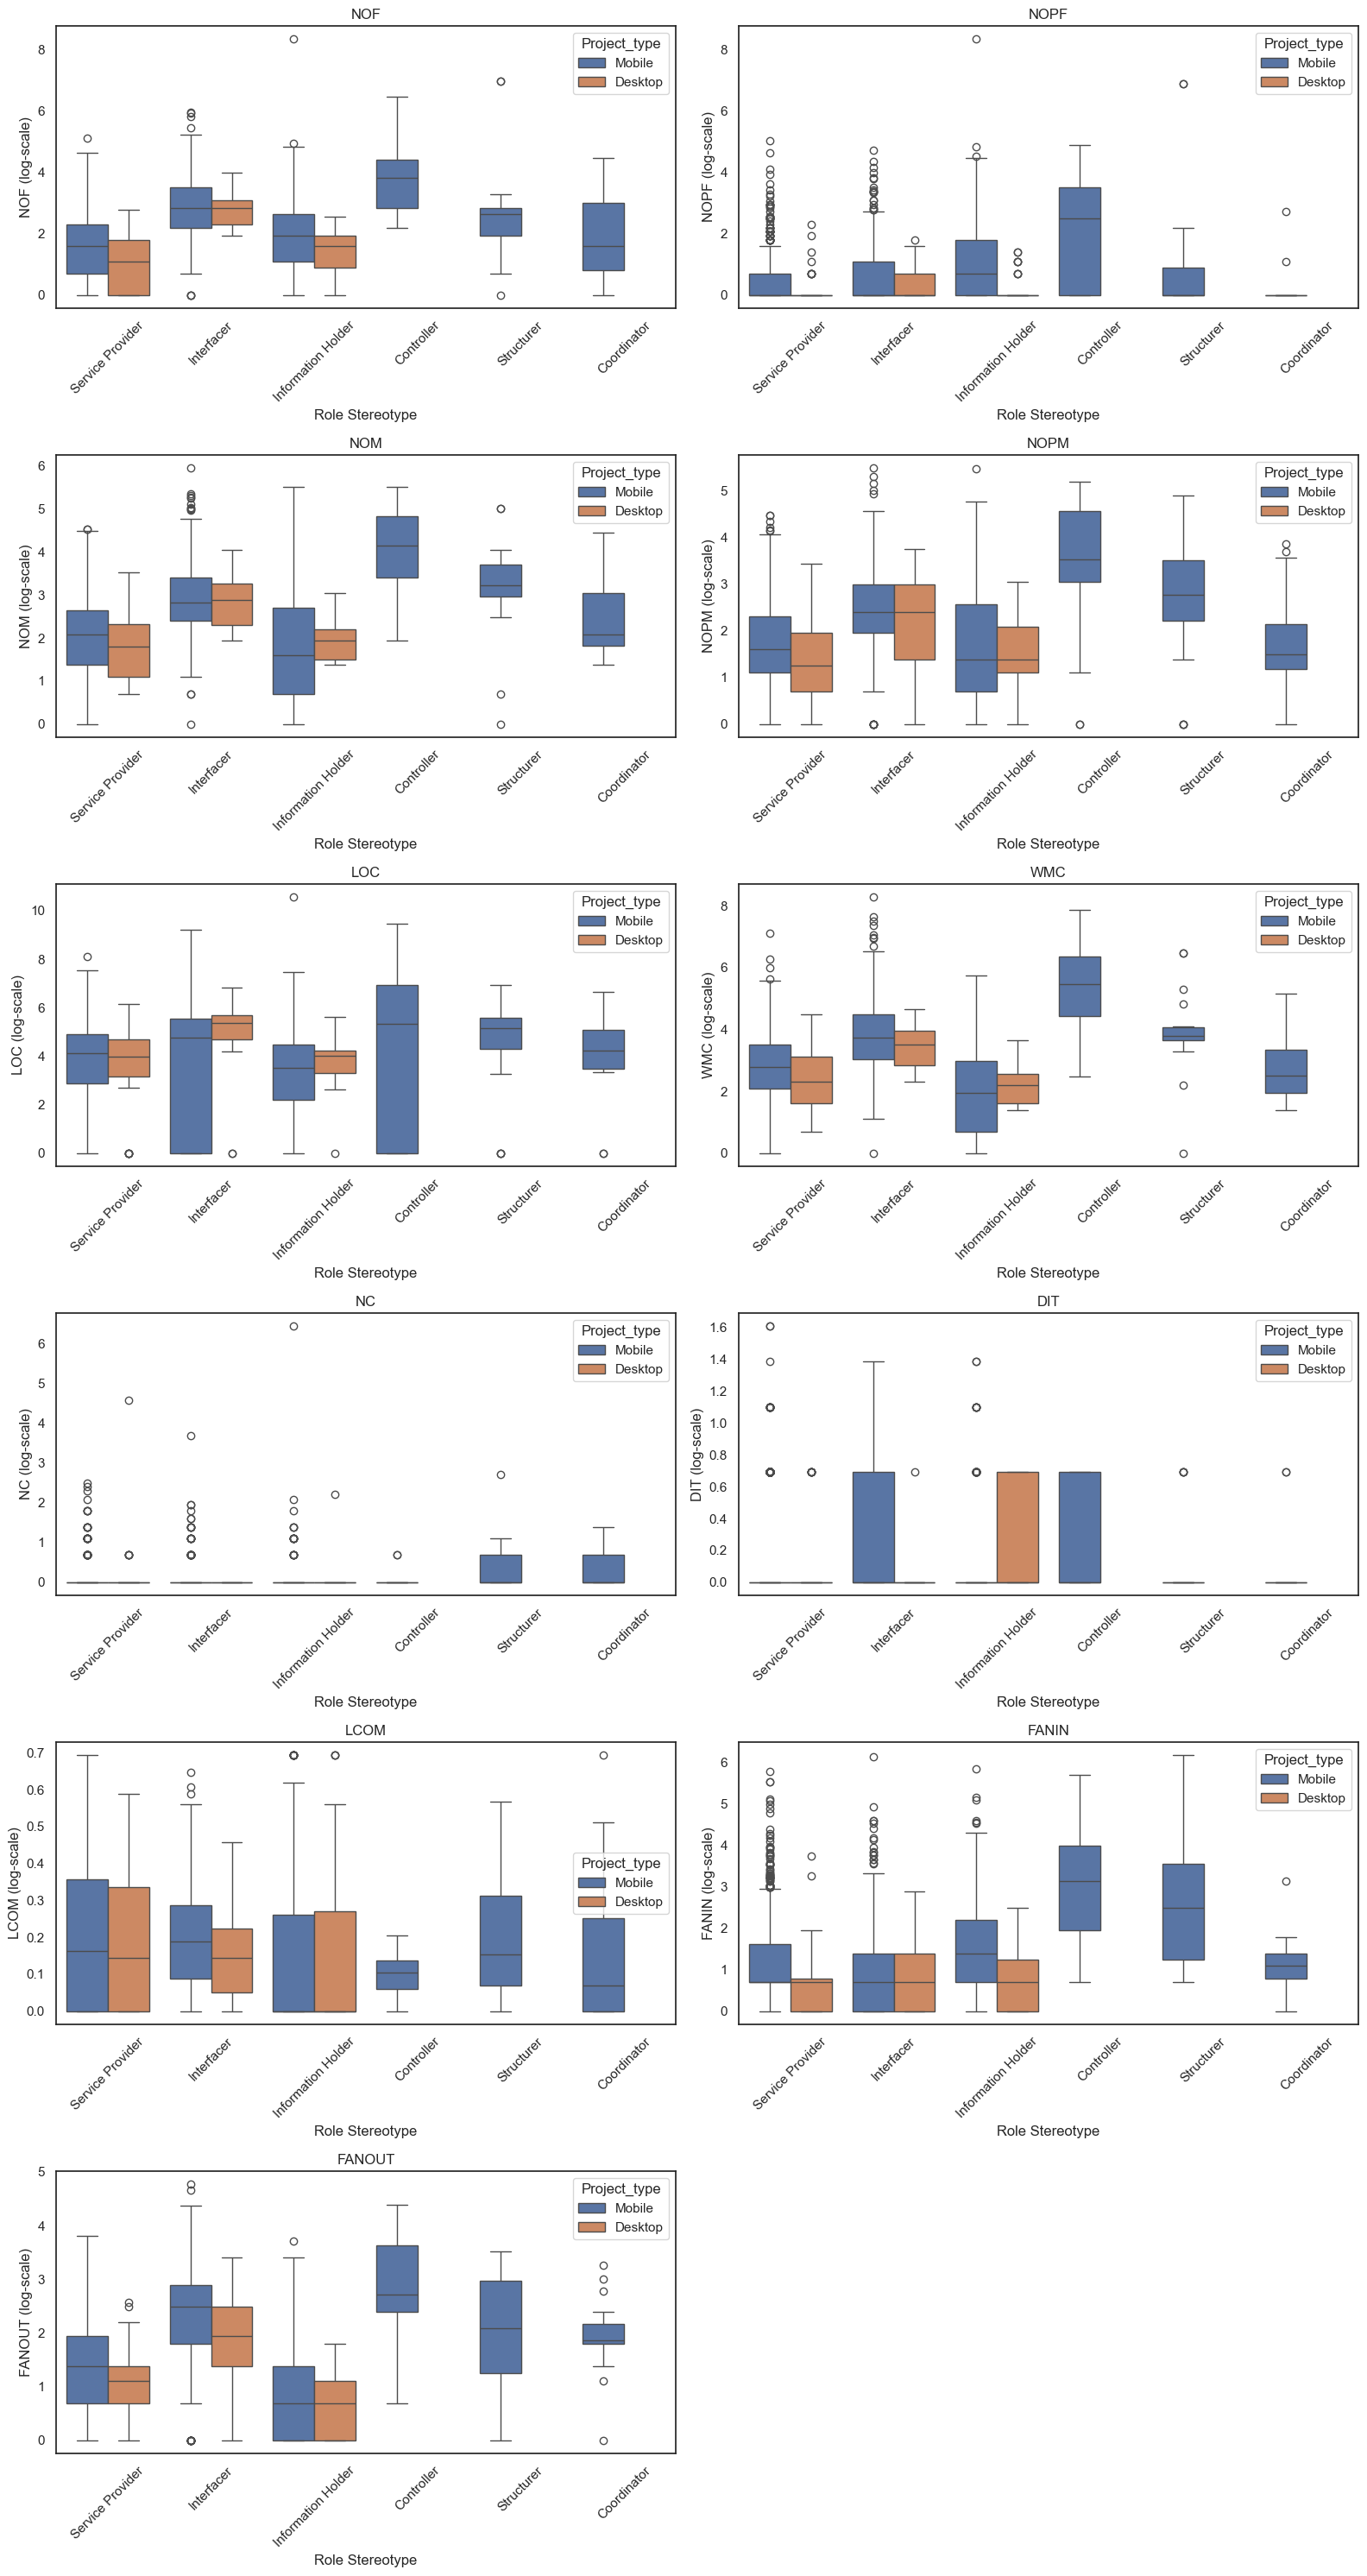

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and apply log1p to all metric columns
log_df = filtered_df.copy()
for metric in metrics:
    log_df[metric] = np.log1p(log_df[metric])  # log(1 + x)

# Plot log-scaled boxplots
import math
num_metrics = len(metrics)
cols = 2
rows = math.ceil(num_metrics / cols)

plt.figure(figsize=(16, rows * 5))
for i, metric in enumerate(metrics):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=log_df, x="label", y=metric, hue="Project_type")
    plt.title(f"{metric}")
    plt.xlabel("Role Stereotype")
    plt.ylabel(f"{metric} (log-scale)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


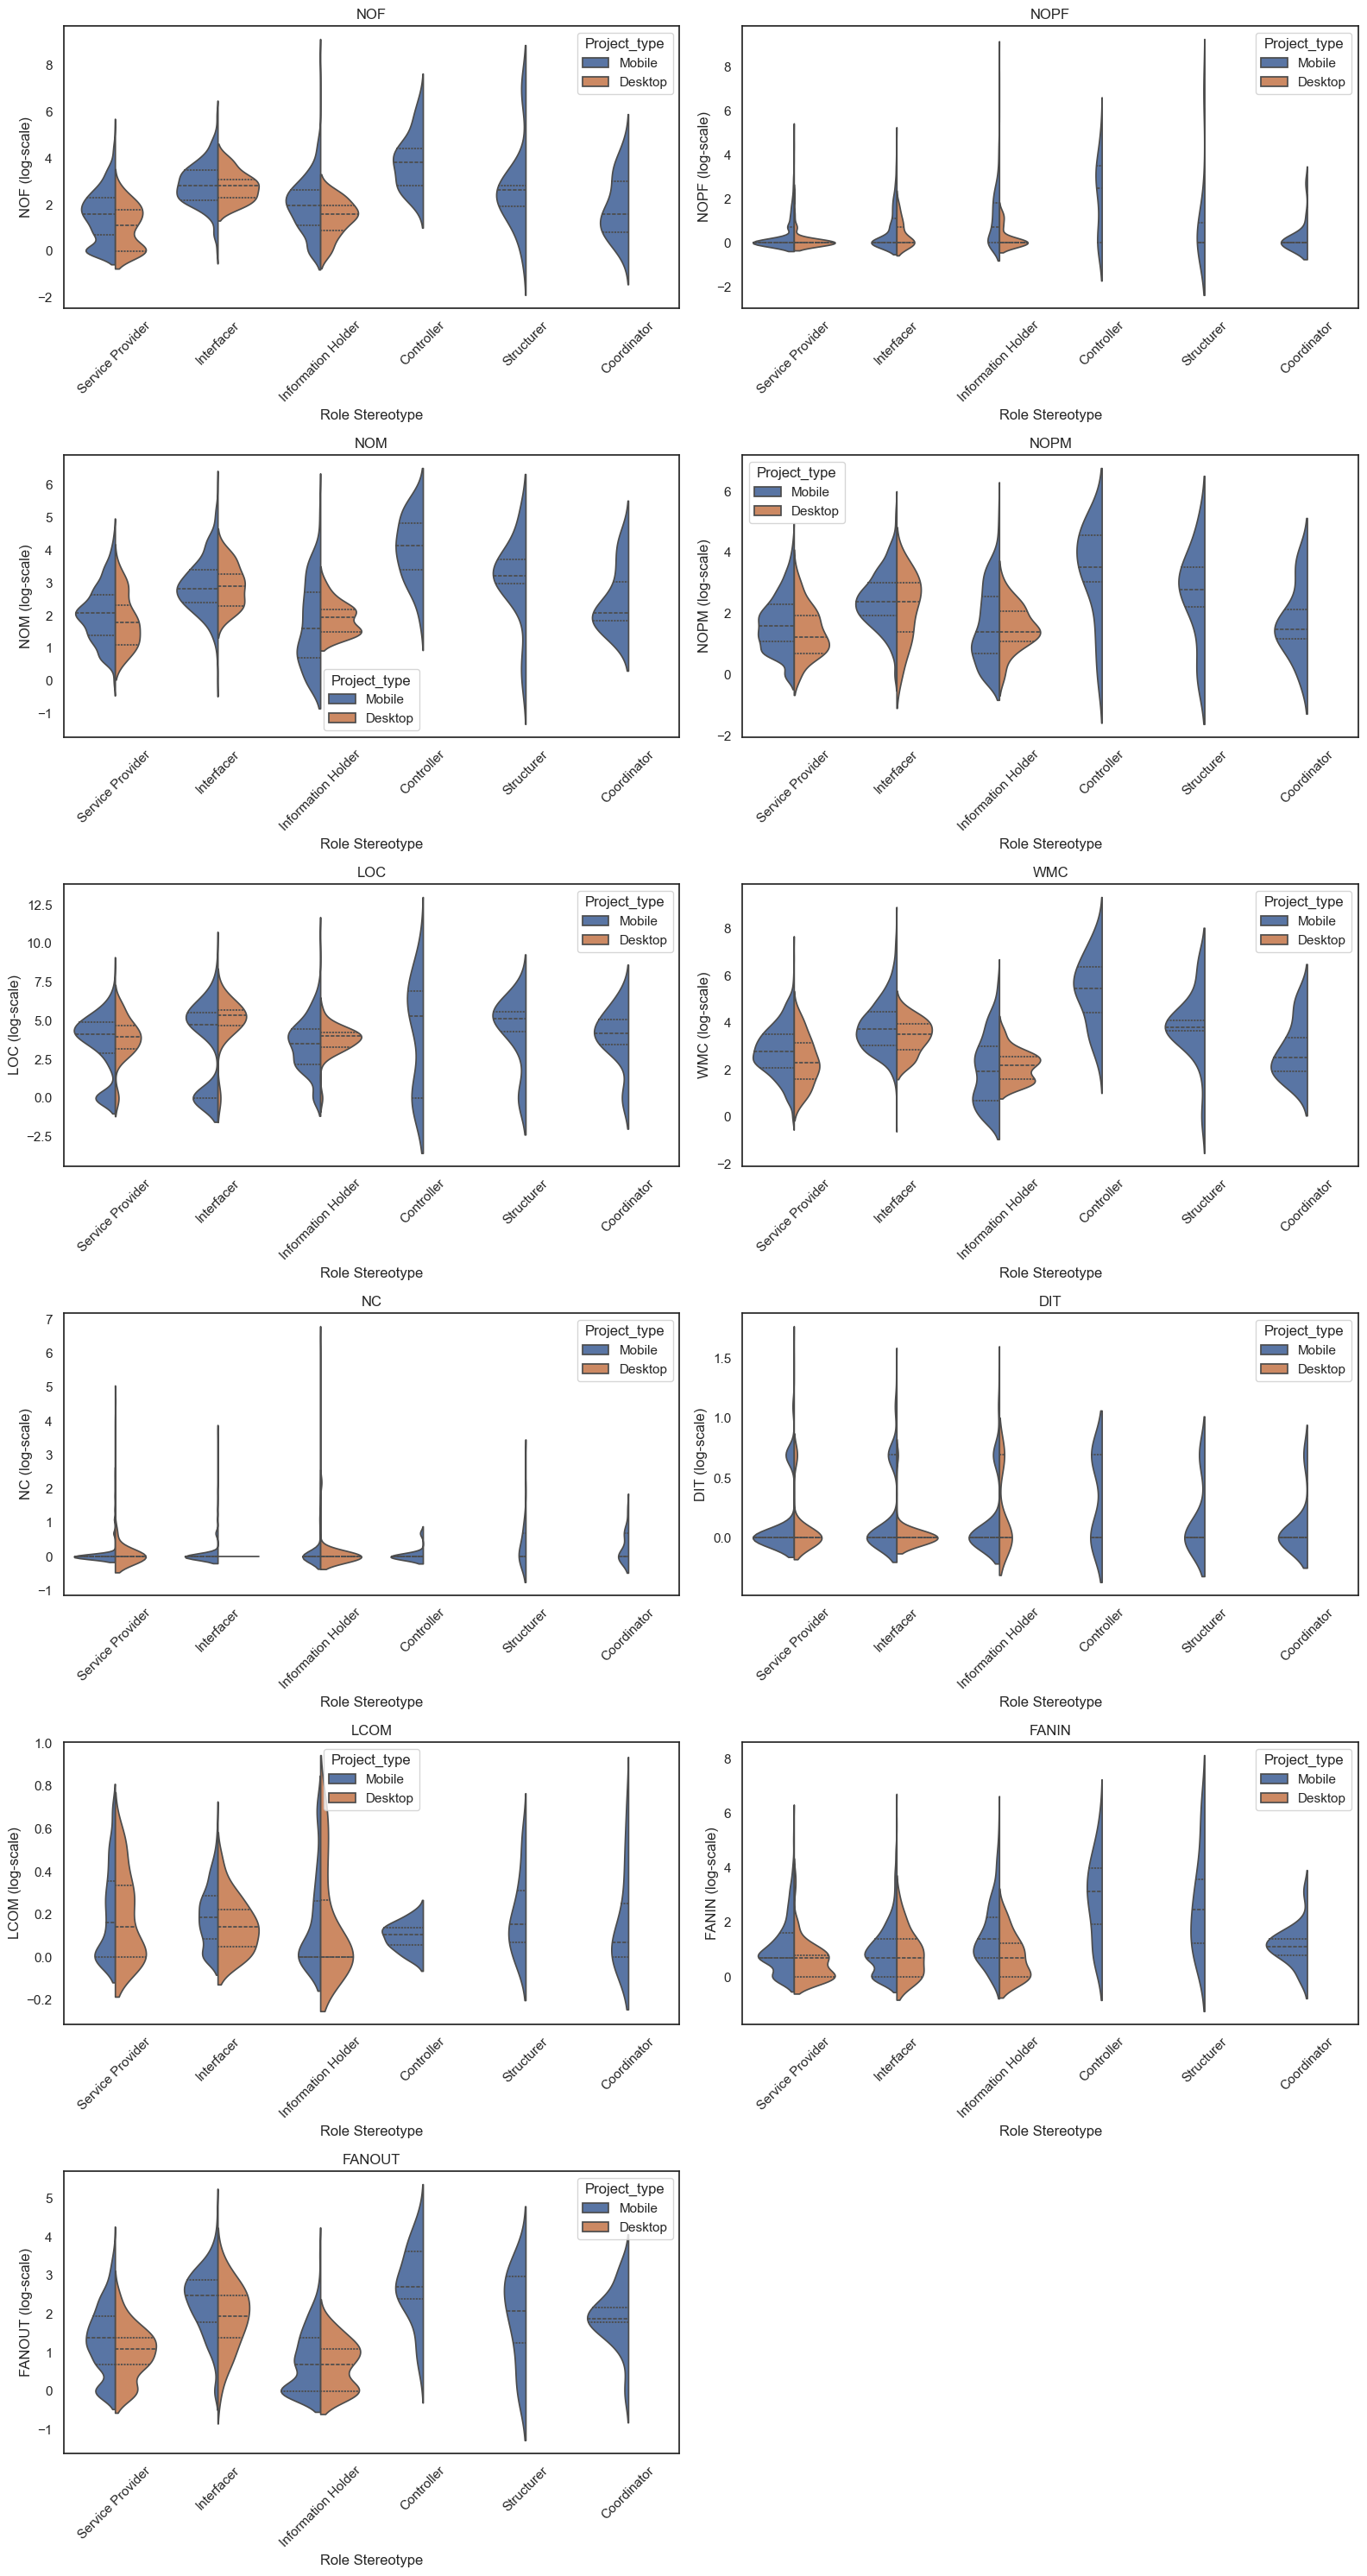

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log1p to all metric columns for violin plots
log_df = filtered_df.copy()
for metric in metrics:
    log_df[metric] = np.log1p(log_df[metric])  # log(1 + x)

# Create violin plots
num_metrics = len(metrics)
cols = 2
rows = math.ceil(num_metrics / cols)

plt.figure(figsize=(16, rows * 5))
for i, metric in enumerate(metrics):
    plt.subplot(rows, cols, i + 1)
    sns.violinplot(data=log_df, x="label", y=metric, hue="Project_type", split=True, inner="quartile")
    plt.title(f"{metric}")
    plt.xlabel("Role Stereotype")
    plt.ylabel(f"{metric} (log-scale)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

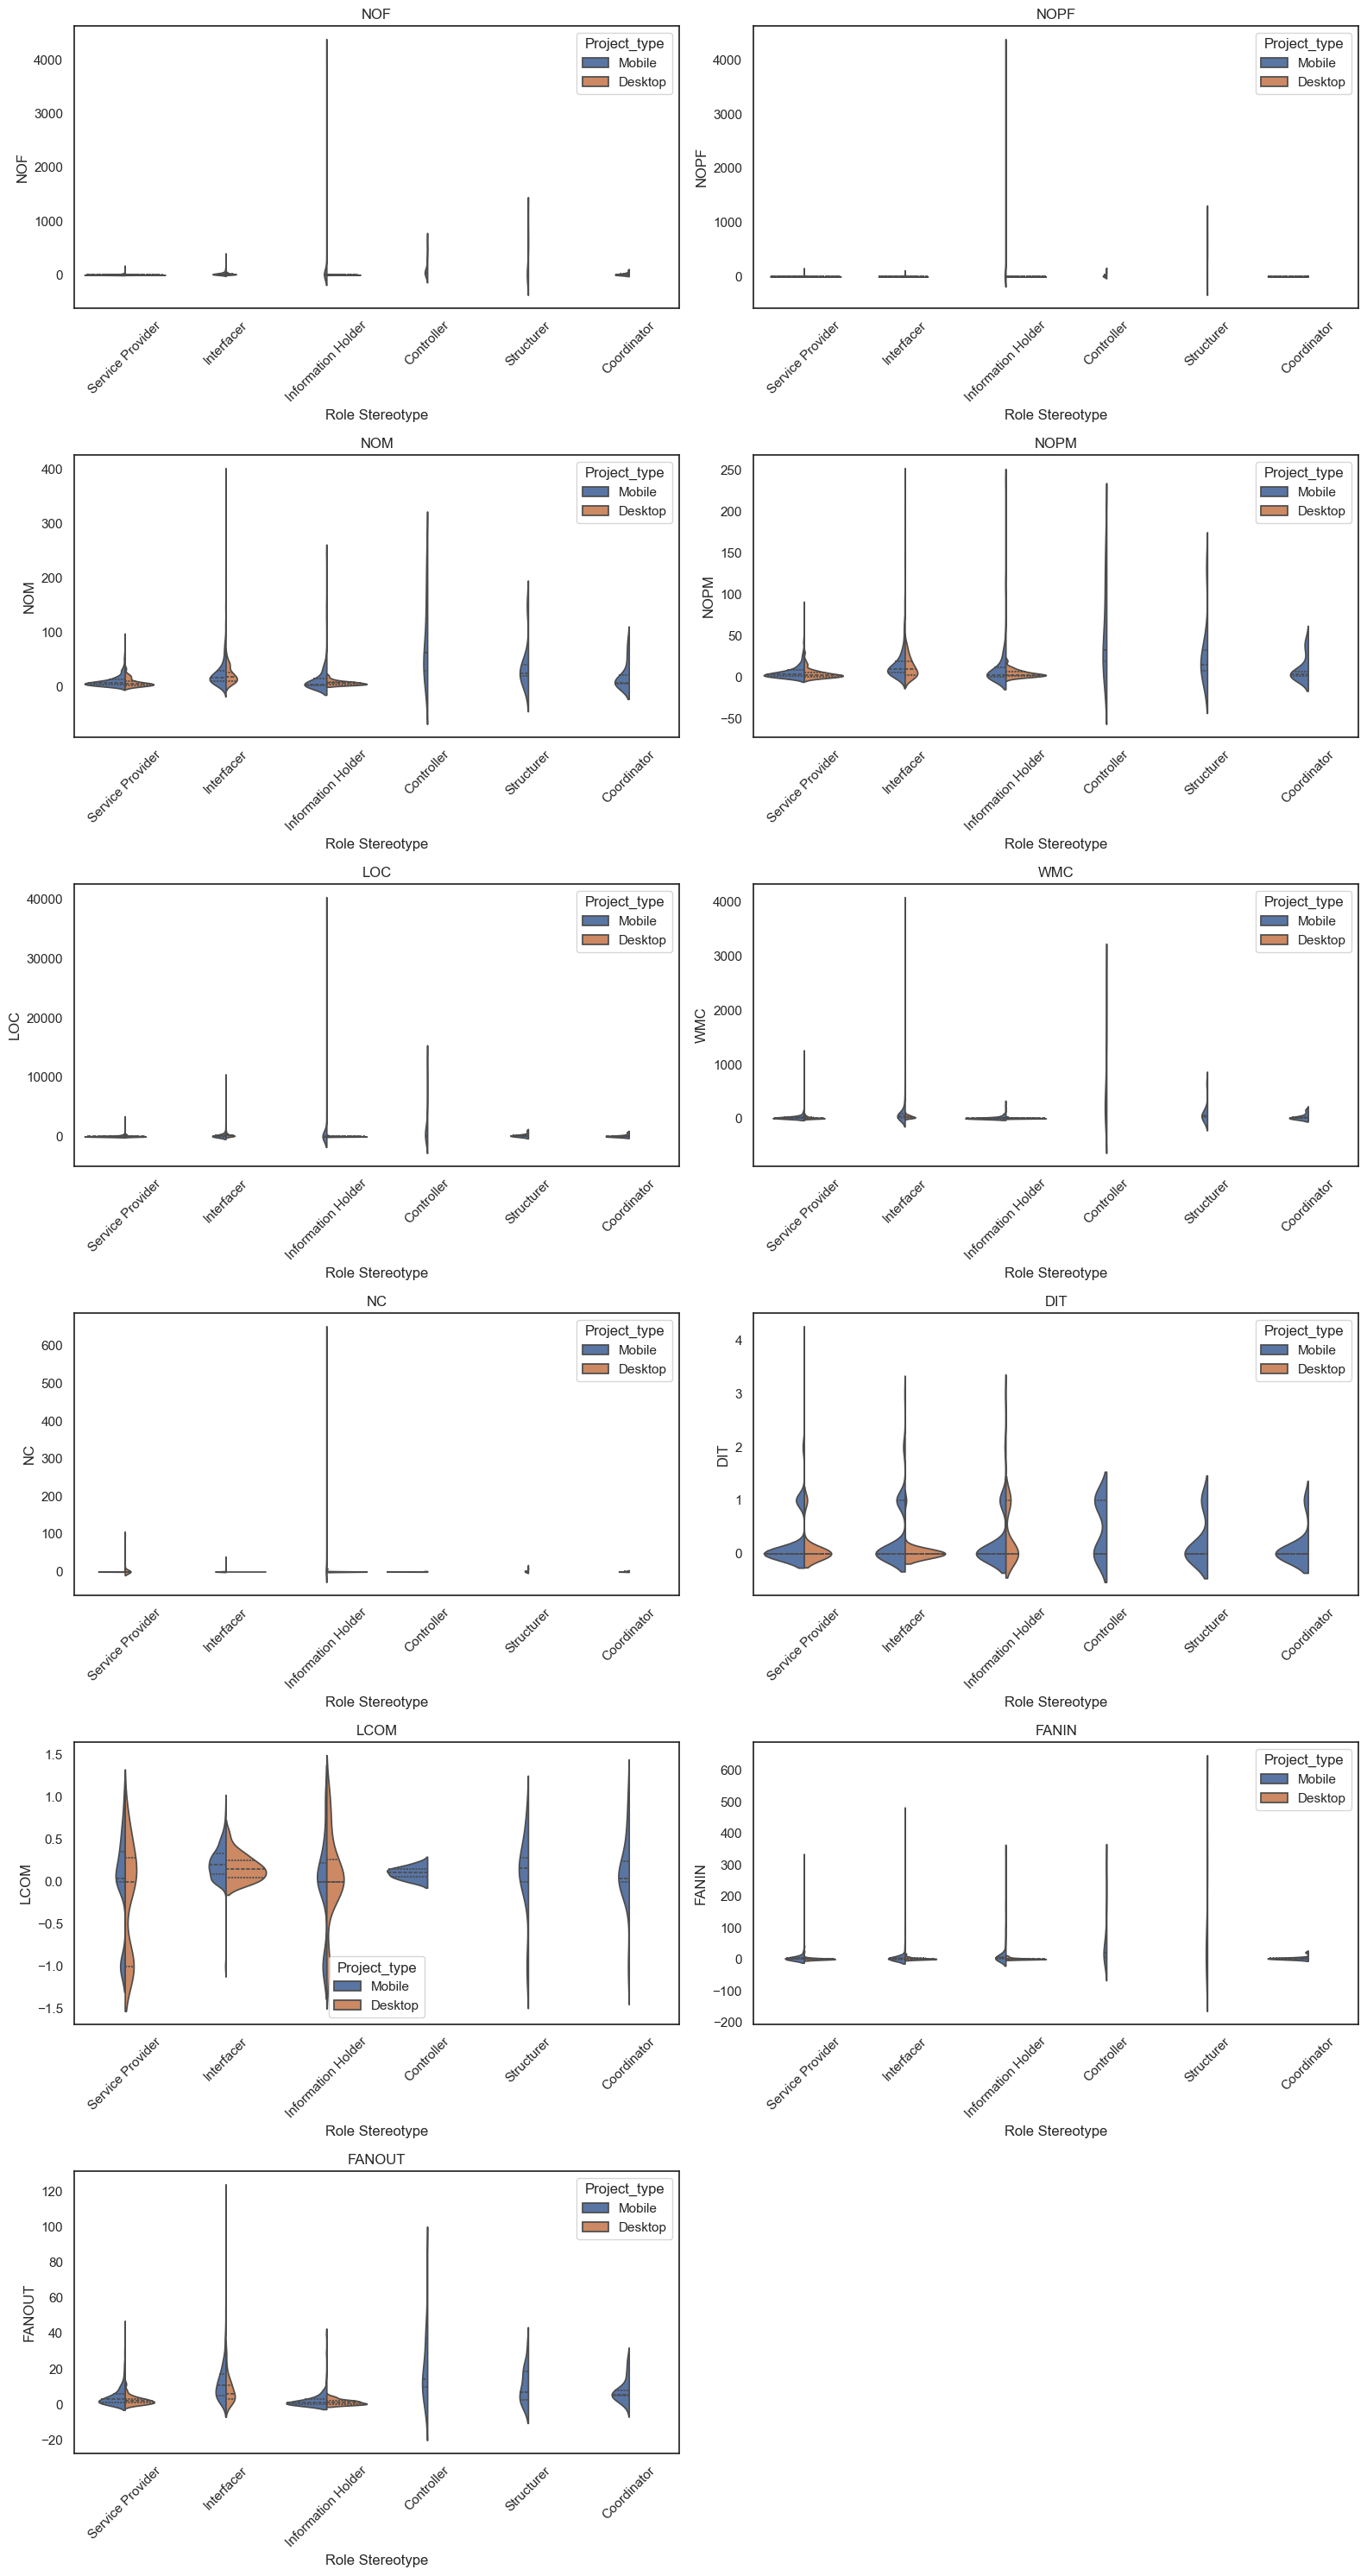

In [12]:
# Revert to original unscaled data
original_df = filtered_df.copy()

# Generate violin plots without log transformation
plt.figure(figsize=(16, rows * 5))
for i, metric in enumerate(metrics):
    plt.subplot(rows, cols, i + 1)
    sns.violinplot(data=original_df, x="label", y=metric, hue="Project_type", split=True, inner="quartile")
    plt.title(f"{metric}")
    plt.xlabel("Role Stereotype")
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.graph_objects as go

# Filter the dataset
plot_df = filtered_df[filtered_df["label"].isin(roles)]

# Generate one plot per metric
for metric in metrics:
    fig = go.Figure()

    for role in roles:
        for side, project_type, color in zip(
            ['negative', 'positive'],
            ['Mobile', 'Desktop'],
            ['blue', 'orange']
        ):
            subset = plot_df[(plot_df["label"] == role) & (plot_df["Project_type"] == project_type)]
            fig.add_trace(go.Violin(
                x=[role]*len(subset),
                y=subset[metric],
                legendgroup=project_type,
                scalegroup=project_type,
                name=project_type,
                side=side,
                line_color=color,
                meanline_visible=True,
                showlegend=(role == roles[0])  # show legend only once
            ))
    # fig.update_yaxes(type="log")

    fig.update_layout(
        title=f"Split Violin Plot of {metric} by Role Stereotype and Project Type",
        violingap=0,
        violinmode='overlay',
        xaxis_title="Role Stereotype",
        yaxis_title=metric
    )
    # fig.update_yaxes(type="log")

    fig.show()

In [24]:


# Apply log1p transformation to metrics
for metric in metrics:
    plot_df[f"log1p_{metric}"] = np.log1p(plot_df[metric])

# Generate one violin plot per metric
for metric in metrics:
    transformed = f"log1p_{metric}"
    fig = go.Figure()

    for role in roles:
        for side, project_type, color in zip(
            ['negative', 'positive'],
            ['Mobile', 'Desktop'],
            ['blue', 'orange']
        ):
            subset = plot_df[(plot_df["label"] == role) & (plot_df["Project_type"] == project_type)]
            fig.add_trace(go.Violin(
                x=[role]*len(subset),
                y=subset[transformed],
                legendgroup=project_type,
                scalegroup=project_type,
                name=project_type,
                side=side,
                line_color=color,
                meanline_visible=True,
                showlegend=(role == roles[0])  # show legend only once
            ))

    fig.update_layout(
        title=f"{metric}",
        violingap=0,
        violinmode='overlay',
        xaxis_title="Role Stereotype",
        yaxis_title=f"logscale"
    )
    fig.show()


In [26]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# # List of metrics and roles
# metrics = ["NOF", "NOPF", "NOM", "NOPM", "LOC", "WMC", "NC", "DIT", "LCOM", "FANIN", "FANOUT"]
# roles = ["Service Provider", "Controller", "Information Holder", "Coordinator", "Structurer", "Interfacer"]

# # Prepare transformed data
# plot_df = filtered_df[filtered_df["label"].isin(roles)].copy()
for metric in metrics:
    plot_df[f"log1p_{metric}"] = np.log1p(plot_df[metric])

# Create subplot layout (6 rows x 2 columns)
rows, cols = 6, 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"log(1 + {m})" for m in metrics])

# Mapping metric to subplot grid
for idx, metric in enumerate(metrics):
    transformed = f"log1p_{metric}"
    row = idx // cols + 1
    col = idx % cols + 1

    for role in roles:
        for side, project_type, color in zip(
            ['negative', 'positive'],
            ['Mobile', 'Desktop'],
            ['blue', 'orange']
        ):
            subset = plot_df[(plot_df["label"] == role) & (plot_df["Project_type"] == project_type)]
            fig.add_trace(go.Violin(
                x=[role]*len(subset),
                y=subset[transformed],
                name=f"{project_type}" if role == roles[0] else None,
                legendgroup=project_type,
                scalegroup=project_type,
                side=side,
                line_color=color,
                meanline_visible=True,
                showlegend=(idx == 0 and role == roles[0])
            ), row=row, col=col)

# Update layout
fig.update_layout(
    height=1800,
    width=1200,
    title_text="Split Violin Plots (log1p Transformed) for All Metrics",
    violingap=0,
    violinmode='overlay'
)

fig.update_yaxes(title_text="log(1 + value)")
fig.show()


In [34]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare the data again if not already
plot_df = filtered_df[filtered_df["label"].isin(roles)].copy()
for metric in metrics:
    plot_df[f"log1p_{metric}"] = np.log1p(plot_df[metric])

# Set up subplot structure
rows, cols = 6, 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{m}" for m in metrics])

# Add box plots to subplots
for idx, metric in enumerate(metrics):
    transformed = f"log1p_{metric}"
    row = idx // cols + 1
    col = idx % cols + 1

    for project_type, color in zip(['Mobile', 'Desktop'], ['blue', 'orange']):
        for role in roles:
            subset = plot_df[(plot_df["label"] == role) & (plot_df["Project_type"] == project_type)]
            fig.add_trace(go.Box(
                x=[role] * len(subset),
                y=subset[transformed],
                name=project_type,
                marker_color=color,
                boxmean=True,
                legendgroup=project_type,
                showlegend=(idx == 0 and role == roles[0])  # show legend only once
            ), row=row, col=col)

# Layout settings
fig.update_layout(
    height=1800,
    width=1200,
    title_text="Box Plots (log1p Transformed) for All Metrics",
)

fig.update_yaxes(title_text="log1p scale")
fig.show()


In [35]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 54.4 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import re
from scipy.stats import mannwhitneyu, kruskal

plot_df = merged_df[merged_df["label"].isin(roles)].dropna(subset=metrics + ["label", "Project_type"])

# Run Mann–Whitney U Test
mannwhitney_results = []
for metric in metrics:
    for role in roles:
        mobile = plot_df[(plot_df['label'] == role) & (plot_df['Project_type'] == 'Mobile')][metric].dropna()
        desktop = plot_df[(plot_df['label'] == role) & (plot_df['Project_type'] == 'Desktop')][metric].dropna()
        if len(mobile) > 0 and len(desktop) > 0:
            stat, p = mannwhitneyu(mobile, desktop, alternative='two-sided')
            mannwhitney_results.append({
                'Metric': metric,
                'Role': role,
                'Mobile n': len(mobile),
                'Desktop n': len(desktop),
                'U Statistic': stat,
                'p-value': p
            })

# Run Kruskal–Wallis Test
kruskal_results = []
for metric in metrics:
    for project_type in ['Mobile', 'Desktop']:
        groups = [plot_df[(plot_df["label"] == role) & (plot_df["Project_type"] == project_type)][metric].dropna()
                  for role in roles]
        if all(len(g) > 0 for g in groups):
            stat, p = kruskal(*groups)
            kruskal_results.append({
                'Metric': metric,
                'Project Type': project_type,
                'H Statistic': stat,
                'p-value': p
            })

# Convert to DataFrames and display
mannwhitney_df = pd.DataFrame(mannwhitney_results)
kruskal_df = pd.DataFrame(kruskal_results)

In [37]:
kruskal_df

Metric Project Type  H Statistic        p-value
0      NOF       Mobile   441.734848   2.978543e-93
1     NOPF       Mobile   137.470289   6.169936e-28
2      NOM       Mobile   357.055984   5.294747e-75
3     NOPM       Mobile   245.610285   4.807139e-51
4      LOC       Mobile    34.254921   2.118335e-06
5      WMC       Mobile   405.509471   1.926488e-85
6       NC       Mobile    26.834279   6.144116e-05
7      DIT       Mobile    19.877471   1.317648e-03
8     LCOM       Mobile    90.045735   6.572306e-18
9    FANIN       Mobile    86.780848   3.185356e-17
10  FANOUT       Mobile   487.364257  4.260554e-103

In [38]:
mannwhitney_df

Metric                Role  Mobile n  Desktop n  U Statistic       p-value
0      NOF    Service Provider       828         76      39282.5  3.012284e-04
1      NOF  Information Holder       230         35       5193.0  5.601726e-03
2      NOF          Interfacer       507         29       7864.5  5.273179e-01
3     NOPF    Service Provider       828         76      36770.5  1.755746e-03
4     NOPF  Information Holder       230         35       5884.0  4.315728e-06
5     NOPF          Interfacer       507         29       7835.0  5.001974e-01
6      NOM    Service Provider       828         76      36860.5  1.304853e-02
7      NOM  Information Holder       230         35       3440.5  1.651764e-01
8      NOM          Interfacer       507         29       7295.5  9.454256e-01
9     NOPM    Service Provider       828         76      36613.5  1.750556e-02
10    NOPM  Information Holder       230         35       3854.0  6.847471e-01
11    NOPM          Interfacer       507         29       8172.0  3.116550e-01
12     LOC    Service Provider       828         76      31604.5  9.486415e-01
13     LOC  Information Holder       230         35       3387.5  1.314665e-01
14     LOC          Interfacer       507         29       5433.0  1.605939e-02
15     WMC    Service Provider       828         76      39016.0  5.247650e-04
16     WMC  Information Holder       230         35       3520.0  2.309528e-01
17     WMC          Interfacer       507         29       8952.5  4.846108e-02
18      NC    Service Provider       828         76      31345.0  9.046519e-01
19      NC  Information Holder       230         35       4268.0  2.301910e-01
20      NC          Interfacer       507         29       8033.0  8.691082e-02
21     DIT    Service Provider       828         76      34214.0  5.988211e-02
22     DIT  Information Holder       230         35       3702.5  2.794710e-01
23     DIT          Interfacer       507         29       9009.5  6.489617e-03
24    LCOM    Service Provider       828         76      36870.0  1.157333e-02
25    LCOM  Information Holder       230         35       3882.0  7.246640e-01
26    LCOM          Interfacer       507         29       8723.0  9.024181e-02
27   FANIN    Service Provider       828         76      42094.0  5.870997e-07
28   FANIN  Information Holder       230         35       5667.0  8.659574e-05
29   FANIN          Interfacer       507         29       7967.0  4.389017e-01
30  FANOUT    Service Provider       828         76      39019.5  4.777585e-04
31  FANOUT  Information Holder       230         35       4198.5  6.709868e-01
32  FANOUT          Interfacer       507         29       9566.0  6.298344e-03

In [ ]:
# somepd = pd.read_csv("data/merged_versions_copied.csv")

In [45]:
# somepd.head()

In [ ]:

# # Define conditions and corresponding values
# conditions = [
#     somepd['TaskID'].isin([1, 2]),
#     somepd['TaskID'].isin([3, 4]),
#     somepd['TaskID'].isin([5, 6]),
#     somepd['TaskID'].isin([7, 8]),
#     somepd['TaskID'].isin([9, 10]),
#     somepd['TaskID'].isin([11, 12]),
#     somepd['TaskID'].isin([13, 14]),
#     somepd['TaskID'].isin([15, 16])
# ]

# values = [1, 2, 3, 4, 5, 6, 7, 8]  # corresponding values for each condition

# # Apply conditions to create the new column
# somepd['TaskGroup'] = np.select(conditions, values, default=0)  

In [ ]:
# somepd.to_csv("merged_versions_copied.csv")